In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5

In [2]:
RNA_avg_logFC = pd.read_csv(f'{Project}/Results/Tables/CPM_RD_calculation/v20221217/adi_RNA_avg_log2FC.tsv', sep='\t').drop(columns='gene_name')
RPF_avg_logFC = pd.read_csv(f'{Project}/Results/Tables/CPM_RD_calculation/v20221217/adi_RPF_avg_log2FC.tsv', sep='\t').drop(columns='gene_name')
RD_avg_logFC = pd.read_csv(f'{Project}/Results/Tables/CPM_RD_calculation/v20221217/adi_RD_avg_log2FC.tsv', sep='\t').drop(columns='gene_name').rename(columns={'D4':'RD4','D8':'RD8'})

PT_logFC = pd.read_csv(f'{Project}/Results/Tables/Proteome/PT_Norm_FC_calculation/v20240403/adi_PT_avg_log2FC.tsv', sep='\t')
PT_conv = pd.read_csv(f'{Project}/Results/Tables/Proteome/adi_proteome_logExp_geneid.tsv', sep='\t', usecols=('uniprot_id','gene_id'))
PT_logFC = pd.merge(PT_conv, PT_logFC, on='uniprot_id').drop(columns='uniprot_id').sort_values('gene_id').drop_duplicates(subset='gene_id')

table = pd.merge(RNA_avg_logFC, RPF_avg_logFC, on='gene_id')
table = pd.merge(table, RD_avg_logFC, on='gene_id').sort_values('gene_id').reset_index(drop=True)
table = pd.merge(table, PT_logFC, on='gene_id', how='left')
display(table)

,gene_id,R4,R8,P4,P8,RD4,RD8,PT4,PT8
0,ENSMUSG00000000001,-0.982948,-1.023048,-0.537169,-0.789533,0.445780,0.233515,-0.382196,-0.625774
1,ENSMUSG00000000028,1.072880,-0.084239,0.840804,-0.100379,-0.232076,-0.016140,NaN,NaN
2,ENSMUSG00000000056,1.186888,1.282568,1.488717,1.855629,0.301829,0.573061,0.256920,0.735677
3,ENSMUSG00000000058,3.776625,3.538820,4.674385,4.585393,0.897759,1.046574,1.496232,2.116544
4,ENSMUSG00000000078,-1.115713,-1.088835,-0.442160,-0.588062,0.673553,0.500773,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11805,ENSMUSG00000118665,-0.396898,-0.921043,-0.010304,-0.286910,0.386593,0.634134,NaN,NaN
11806,ENSMUSG00000118667,-1.368068,-2.526532,-1.260916,-2.829809,0.107152,-0.303278,NaN,NaN
11807,ENSMUSG00000118668,-1.018197,-1.132709,-0.897254,-1.120947,0.120944,0.011763,NaN,NaN
11808,ENSMUSG00000118669,0.368468,0.186797,0.123991,-0.008093,-0.244477,-0.194891,NaN,NaN


In [3]:
# https://hongl.tistory.com/100

def modified_z_score(my_data):
    ## First Calculate Median
    median_my_data = np.median(my_data)
    
    ## Median Absolute Deviation 
    ## Median of | X_i - median of X| for all X_i
    mad = np.median(my_data.map(lambda x: np.abs(x - median_my_data)))
    
    ## Modified Z score
    ## 0.6745 * (X_i - median of X)/Median Absolute Deviation
    modified_z_score = list(my_data.map(lambda x: 0.6745* (x - median_my_data)/mad))
    return modified_z_score


RNA = pd.read_csv(f'{Project}/Results/Tables/CPM_RD_calculation/v20221217/adi_RNA_avg_log2FC.tsv', sep='\t').drop(columns='gene_name')
RPF = pd.read_csv(f'{Project}/Results/Tables/CPM_RD_calculation/v20221217/adi_RPF_avg_log2FC.tsv', sep='\t').drop(columns='gene_name')
PT = pd.read_csv(f'{Project}/Results/Tables/Proteome/PT_Norm_FC_calculation/v20240403/adi_PT_avg_log2FC.tsv', sep='\t')

RNA_z = RNA[['gene_id']].copy()
RPF_z = RPF[['gene_id']].copy()
PT_z = PT[['uniprot_id']].copy()
for col in RNA.iloc[:,1:]:
    RNA_z[col] = modified_z_score(RNA[col])
for col in RPF.iloc[:,1:]:
    RPF_z[col] = modified_z_score(RPF[col])
for col in PT.iloc[:,1:]:
    PT_z[col] = modified_z_score(PT[col])

PT_conv = pd.read_csv(f'{Project}/Results/Tables/Proteome/adi_proteome_logExp_geneid.tsv', sep='\t', usecols=('uniprot_id','gene_id'))
PT_z = pd.merge(PT_conv, PT_z, on='uniprot_id').drop(columns='uniprot_id').sort_values('gene_id').drop_duplicates(subset='gene_id')

table2 = pd.merge(RNA_z, RPF_z, on='gene_id')
table2 = pd.merge(table2, PT_z, on='gene_id', how='left')
table2 = table2.rename(columns={col:col+'_z' for col in table2.columns[1:]}).sort_values('gene_id').reset_index(drop=True)
display(table2)

,gene_id,R4_z,R8_z,P4_z,P8_z,PT4_z,PT8_z
0,ENSMUSG00000000001,-0.913050,-0.820007,-0.552149,-0.678351,-0.792871,-0.924538
1,ENSMUSG00000000028,1.132717,-0.050105,0.943350,-0.080714,NaN,NaN
2,ENSMUSG00000000056,1.246167,1.070791,1.646523,1.615545,0.483257,1.101074
3,ENSMUSG00000000058,3.823230,2.921106,5.103893,3.982810,2.957803,3.155573
4,ENSMUSG00000000078,-1.045164,-0.873958,-0.449037,-0.503635,NaN,NaN
...,...,...,...,...,...,...,...
11805,ENSMUSG00000118665,-0.329868,-0.736355,0.019651,-0.242474,NaN,NaN
11806,ENSMUSG00000118667,-1.296285,-2.052989,-1.337624,-2.447688,NaN,NaN
11807,ENSMUSG00000118668,-0.948126,-0.909938,-0.942946,-0.965755,NaN,NaN
11808,ENSMUSG00000118669,0.431753,0.172167,0.165401,-0.000683,NaN,NaN


In [4]:
total_table = pd.concat([table, table2.iloc[:,1:]], axis=1)
display(total_table)

,gene_id,R4,R8,P4,P8,RD4,RD8,PT4,PT8,R4_z,R8_z,P4_z,P8_z,PT4_z,PT8_z
0,ENSMUSG00000000001,-0.982948,-1.023048,-0.537169,-0.789533,0.445780,0.233515,-0.382196,-0.625774,-0.913050,-0.820007,-0.552149,-0.678351,-0.792871,-0.924538
1,ENSMUSG00000000028,1.072880,-0.084239,0.840804,-0.100379,-0.232076,-0.016140,NaN,NaN,1.132717,-0.050105,0.943350,-0.080714,NaN,NaN
2,ENSMUSG00000000056,1.186888,1.282568,1.488717,1.855629,0.301829,0.573061,0.256920,0.735677,1.246167,1.070791,1.646523,1.615545,0.483257,1.101074
3,ENSMUSG00000000058,3.776625,3.538820,4.674385,4.585393,0.897759,1.046574,1.496232,2.116544,3.823230,2.921106,5.103893,3.982810,2.957803,3.155573
4,ENSMUSG00000000078,-1.115713,-1.088835,-0.442160,-0.588062,0.673553,0.500773,NaN,NaN,-1.045164,-0.873958,-0.449037,-0.503635,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11805,ENSMUSG00000118665,-0.396898,-0.921043,-0.010304,-0.286910,0.386593,0.634134,NaN,NaN,-0.329868,-0.736355,0.019651,-0.242474,NaN,NaN
11806,ENSMUSG00000118667,-1.368068,-2.526532,-1.260916,-2.829809,0.107152,-0.303278,NaN,NaN,-1.296285,-2.052989,-1.337624,-2.447688,NaN,NaN
11807,ENSMUSG00000118668,-1.018197,-1.132709,-0.897254,-1.120947,0.120944,0.011763,NaN,NaN,-0.948126,-0.909938,-0.942946,-0.965755,NaN,NaN
11808,ENSMUSG00000118669,0.368468,0.186797,0.123991,-0.008093,-0.244477,-0.194891,NaN,NaN,0.431753,0.172167,0.165401,-0.000683,NaN,NaN


In [5]:
RD_edgeR = pd.read_csv(f'{Project}/Results/Tables/CPM_RD_calculation/v20240213_RD-edgeR/adi_PvsR_8d_vs_0d.tsv', sep='\t')
display(RD_edgeR)

,gene_id,gene_name,logFC,logCPM,F,PValue,FDR
0,ENSMUSG00000033845,Mrpl15,-0.417312,6.910172,1.926867,0.184135,0.486483
1,ENSMUSG00000025903,Lypla1,-0.288884,4.992428,0.728166,0.406077,0.712791
2,ENSMUSG00000033813,Tcea1,0.123860,5.567469,0.231341,0.637045,0.863500
3,ENSMUSG00000033793,Atp6v1h,0.247764,7.341299,3.202236,0.092488,0.339506
4,ENSMUSG00000025907,Rb1cc1,-0.333257,5.137698,0.973299,0.338549,0.657843
...,...,...,...,...,...,...,...
11810,ENSMUSG00000064358,mt-Co3,-3.060875,8.666829,38.596916,0.000012,0.004093
11811,ENSMUSG00000064363,mt-Nd4,-1.418645,9.774806,11.147472,0.004166,0.065662
11812,ENSMUSG00000064367,mt-Nd5,-0.610589,9.730366,3.989424,0.063091,0.279391
11813,ENSMUSG00000064368,mt-Nd6,-0.363496,9.083706,0.901765,0.356438,0.673314


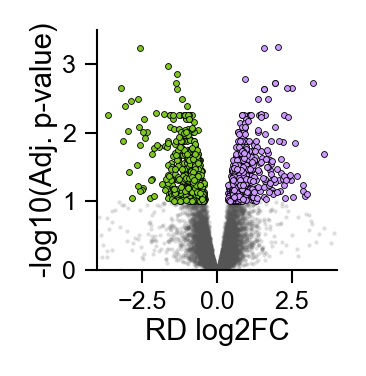

In [6]:
sF = 1 # Size factor
wgap = 0.1
hgap = 0.1
nrow, ncol = 1, 1

height_ratios = [0.8]*nrow
width_ratios = [0.8]*ncol

fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF
fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    height_ratios=height_ratios,
                    width_ratios=width_ratios,
                    left=0, right=1, bottom=0, top=1,
                    wspace=wgap, hspace=hgap)

ax = fig.add_subplot(grid[0,0])

tmp = RD_edgeR[RD_edgeR['FDR']>0.1]
ax.scatter(tmp['logFC'],
           -np.log10(tmp['FDR']),
           c='#555555', s=1, alpha=0.2,
           lw=0,
           rasterized=True)

tmp = RD_edgeR[ (RD_edgeR['logFC']<0) & (RD_edgeR['FDR']<0.1)]
ax.scatter(tmp['logFC'],
           -np.log10(tmp['FDR']),
           c='#81C81E', s=2,
           lw=0.2, edgecolors='k',
           rasterized=True)

tmp = RD_edgeR[ (RD_edgeR['logFC']>0) & (RD_edgeR['FDR']<0.1)]
ax.scatter(tmp['logFC'],
           -np.log10(tmp['FDR']),
           c='#CC99FF', s=2,
           lw=0.2, edgecolors='k',
           rasterized=True)

ax.set_xlim(-4, 4)
ax.set_ylim(0, 3.5)
# ax.set_xticks([-6, -3, 0, 3, 6])
ax.set_yticks([0, 1, 2, 3])
ax.tick_params(width=0.5, length=3, pad=2)

ax.set_xlabel('RD log2FC', labelpad=1)
ax.set_ylabel('-log10(Adj. p-value)', labelpad=1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

plt.savefig('RD-DEG_volcano.pdf', bbox_inches='tight')
plt.show()
plt.close()

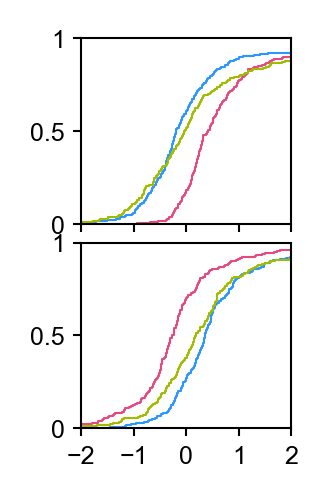

In [7]:
sF = 1 # Size factor
wgap = 0.1
hgap = 0.1
nrow, ncol = 2, 1

height_ratios = [0.6]*nrow
width_ratios = [0.7]*ncol

fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF
fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    height_ratios=height_ratios,
                    width_ratios=width_ratios,
                    left=0, right=1, bottom=0, top=1,
                    wspace=wgap, hspace=hgap)


# RD log2FC < -0.5
tmp = RD_edgeR[ (RD_edgeR['logFC']<0) & (RD_edgeR['FDR']<0.1)]
RD_down = pd.merge(tmp[['gene_id']], total_table, on='gene_id').dropna()

ax = fig.add_subplot(grid[0,0])

# ax.ecdf(total_table['R8_z'], c='k', lw=0.5)
# ax.ecdf(total_table['P8_z'], c='k', lw=0.5)
# ax.ecdf(total_table['PT8_z'], c='k', lw=0.5)

ax.ecdf(RD_down['R8_z'],  c='#e54980', lw=0.5)
ax.ecdf(RD_down['P8_z'],  c='#2c96ff', lw=0.5)
ax.ecdf(RD_down['PT8_z'], c='#a1bc00', lw=0.5)

ax.set_xlim(-2,2)
ax.set_ylim(0,1)
ax.set_xticks([-2,-1,0,1,2])
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([0, 0.5, 1])
ax.set_xticklabels([])
ax.tick_params(width=0.5, length=2, pad=2)


# RD log2FC > 0.5
tmp = RD_edgeR[ (RD_edgeR['logFC']>0) & (RD_edgeR['FDR']<0.1)]
RD_up = pd.merge(tmp[['gene_id']], total_table, on='gene_id').dropna()

ax = fig.add_subplot(grid[1,0])

# ax.ecdf(total_table['R8_z'], c='k', lw=0.5)
# ax.ecdf(total_table['P8_z'], c='k', lw=0.5)
# ax.ecdf(total_table['PT8_z'], c='k', lw=0.5)

ax.ecdf(RD_up['R8_z'],  c='#e54980', lw=0.5)
ax.ecdf(RD_up['P8_z'],  c='#2c96ff', lw=0.5)
ax.ecdf(RD_up['PT8_z'], c='#a1bc00', lw=0.5)

ax.set_xlim(-2,2)
ax.set_ylim(0,1)
ax.set_xticks([-2,-1,0,1,2])
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([0, 0.5, 1])
ax.tick_params(width=0.5, length=2, pad=2)

plt.savefig('RD-DEG_cumul.pdf', bbox_inches='tight')
plt.show()
plt.close()